# 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks)

1. **<font color='#ff6f61'>가중치(Weight)-편향(bias) 연산</font>**<br/>
위에서 알아본 것처럼 퍼셉트론은 여러 개의 신호를 입력받습니다.<br/>
입력된 신호는 각각의 가중치와 곱해지고 그 결과를 더해주게 되는데요.<br/>
이러한 **가중합(Weighted Sum)**이 퍼셉트론의 첫 번째 단계입니다.

    간단한 예시 코드를 통해 가중합이 어떻게 일어나는지 알아보겠습니다.

In [1]:
import numpy as np

input = np.array([1, 2, 3])
weight = np.array([0.2, 0.3, -0.1])

np.dot(input, weight)

0.5

위 식에서 입력 신호(**`input`**) $[1, 2, 3]$ 에 대해 임의의 가중치(**`weight`**) $[0.2, 0.3, -0.1]$ 가 설정되어 있는데요.<br/>
코드가 수행하는 계산은 다음과 같습니다.<br/>

$$
1 \times 0.2 + 2 \times 0.3 + 3 \times (-0.1) = 0.5
$$

<br/>

이를 일반화 시키면 입력 신호 $(x_0, x_1, \cdots)$와 가중치$(w_0, w_1, \cdots)$에 대하여 다음과 같은 식으로 나타낼 수 있습니다.

$$
\sum(b + w_0x_0 + w_1x_1 + ... + w_nx_n)
$$

<br/>

2. **<font color='#ff6f61'>활성화 함수(Activation function)</font>**<br/>
활성화 함수는 계산된 **가중합을 얼마 만큼의 신호로 출력**할지를 결정합니다.<br/>
아래에서는 여러 가지 활성화 함수를 알아보도록 하겠습니다.

### 활성화 함수 (Activation Function)

아래에서 기본이 되는 혹은 자주 사용되는 활성화 함수**(Step, Sigmoid, ReLU, Softmax)**를 알아보도록 하겠습니다.

#### 계단 함수(Step function)

첫 번째로 알아볼 활성화 함수는 **계단 함수(Step function)**입니다.<br/>
가장 간단한 활성화 함수인 계단 함수는 입력값이 임계값(여기서는 0)을 넘기면 1을, 그렇지 않으면 0을 출력하는 함수입니다.<br/>
계단 함수의 그래프는 아래와 같습니다.

<img src="https://i.imgur.com/Pbf8B4B.png" width="350">

---

#### 시그모이드 함수(Sigmoid function)

신경망이 경사 하강법을 통해 학습을 진행하기 위해서는 '미분'과정이 필요합니다.

<br/>

하지만 계단 함수는 **임계값 지점에서 미분이 불가능**하고, **나머지 지점에서는 미분값이 0**이 나옵니다.<br/>
그렇기 때문에 실제로 계단 함수를 활성화 함수로 사용하면 학습이 제대로 이루어지지 않는데요.

**<font color='#ff6f61'>시그모이드 함수(Sigmoid function)</font>**는 이런 단점을 해결하기 위해 사용된 함수입니다.<br/>
먼저 시그모이드 함수가 어떻게 생겼는지 그래프를 통해 알아보겠습니다.

<img src="https://i.imgur.com/W884y3K.png" width="400">

---

계단 함수처럼 임계값(0)보다 작은 부분은 0에 가까워지고, 큰 부분은 1에 가까워집니다.<br/>
하지만 조금 더 부드럽게 연결되어 있기 때문에 **모든 지점에서 미분 가능**하며, **미분값도 0이 아닙니다.**


#### ReLU 함수(ReLU function)

ReLU(렐루) 함수는 신경망 발전에 큰 영향을 미친 활성화 함수입니다.<br/>
시그모이드 함수를 중복하여 사용하게 되면 **기울기 소실(Vanishing Gradient) 문제**가 발생하게 되는데요.<br/>
기울기 소실 문제를 해결하기 위해서 등장한 것이 ReLU 입니다.


ReLU 함수는 **양의 값이 입력되면 그 값을 그대로 출력하고 음의 값이 입력되면 0을 반환**합니다.<br/>
식으로 나타내면 아래와 같이 나타낼 수 있습니다.

$$
f(x) = \max(0, x)
$$

ReLU 함수의 그래프는 다음과 같습니다.

<img src="https://i.imgur.com/HuorFwZ.png" width="450">

---

#### 소프트맥스 함수(Softmax function)

**<font color='#ff6f61'>소프트맥스(Softmax) 함수</font>**는 다중 분류(Multi-classification) 문제에 적용할 수 있도록 시그모이드 함수를 일반화한 활성화 함수입니다.<br/>
가중합 값을 소프트맥스 함수에 통과시키면 모든 클래스의 값의 **합이 1이 되는 확률값으로 변환**됩니다.

<img src="https://i.imgur.com/2fxkerW.png" width="600">

## Tensorflow 신경망 예제

### Iris 데이터 분류하기

머신러닝(Section 2)에서 사용했던 **붓꽃(Iris) 데이터**에 신경망을 적용하여 봅시다.

전체 특성 중 2개의 특성(**`sepal length, petal length`**)만 선택하여 사용하고,<br/>
150개의 데이터 중 Setosa(50), Versicolor(50)만 추출하여 100개의 데이터에 대해서 **이진 분류(Binary classification)**를 진행해 보겠습니다.

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2. **시드(Seed)를 고정합니다.**

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

3. **Iris 데이터셋을 DataFrame 형태로 불러온 후 데이터 형태를 살펴봅니다.**

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

4. **Setosa, Versicolor 데이터만 추출하여 전처리 하여줍니다.**

In [7]:
label = df.iloc[0:100, 4].values
label

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

타겟 레이블을 setosa = 0, versicolor = 1 로 변경해줍니다.

In [8]:
label = np.where(label == 'Iris-setosa', 0, 1)
label.astype(object)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

5. **데이터가 어떤 분포를 가지고 있는지 시각화를 통해 알아봅시다.**

In [9]:
features = df.iloc[0:100, [0,2]].values
features.shape

(100, 2)

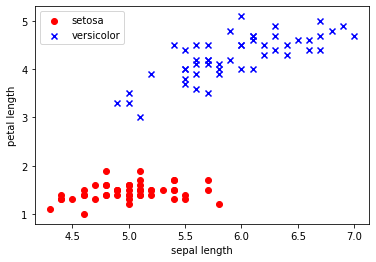

In [10]:
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

5. **학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)줍니다.**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

6. **신경망 모델을 구축하고 컴파일(complie)한 후 학습합니다.**

이번 예제에서는 단층, 즉 **은닉층 없이 출력층으로만** 모델을 구성할 예정입니다.<br/>
그렇다면 입력층은 어디에 있을까요? 그리고 입력층의 노드 개수는 몇 개가 될까요?

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

**`.complie`** 에서는 신경망에서 사용할 옵티마이저(**`optimizer`**), 손실 함수(**`loss`**), 지표(**`metrics`**)를 설정합니다.

In [14]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**`.fit`** 은 실제로 신경망 학습이 진행되는 부분입니다.<br/>
에포크(`epochs`)를 조정하면 학습 횟수를 조정할 수 있습니다.

In [15]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 1s 7ms/step - loss: 2.1103 - accuracy: 0.5250
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 1.9348 - accuracy: 0.5250
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 1.7644 - accuracy: 0.5250
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 1.5976 - accuracy: 0.5250
Epoch 5/30
3/3 [==============================] - 0s 4ms/step - loss: 1.4271 - accuracy: 0.5250
Epoch 6/30
3/3 [==============================] - 0s 3ms/step - loss: 1.2720 - accuracy: 0.5250
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 1.1141 - accuracy: 0.5250
Epoch 8/30
3/3 [==============================] - 0s 3ms/step - loss: 0.9701 - accuracy: 0.5250
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8486 - accuracy: 0.5250
Epoch 10/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7422 - accuracy: 0.5250
Epoch 11/30
3/3 [======================

7. **학습한 신경망 모델을 사용하여 평가합니다.**

In [16]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.3918 - accuracy: 1.0000 - 107ms/epoch - 107ms/step


[0.3918049931526184, 1.0]

### 손글씨 MNIST 예제

MNIST 손글씨 예제는 가장 기본적인 이미지 분류(Image Classification) 예제입니다.<br/>
사람이 **0-9까지 쓴 흑백 손글씨 숫자 이미지를 각 클래스로 분류**합니다.<br/>
데이터는 가로, 세로 28픽셀(pixels)로 구성된 정사각형 이미지입니다.

실제 데이터가 어떻게 생겼고 어떻게 분류되어야 할 지 이미지를 통해 알아보겠습니다.

<img src="https://abpaudel.com/assets/img/posts/mnist.png" width=500>

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [17]:
import pandas as pd
import tensorflow as tf

2. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**

In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


이미지 데이터에서는 정규화하는 과정이 중요합니다. 빼먹지 않도록 주의해주세요!

In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

3. **레이블이 어떻게 구성되어 있는 지 확인해봅니다.**

    데이터의 레이블 구성 형태를 살펴봅니다.<br/>
    처음보는 데이터의 경우 데이터 자체를 디스플레이 하여 보면 도움이 됩니다.

In [20]:
pd.unique(y_train)

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

4. **이제 본격적으로 신경망 모델을 구축해보겠습니다.**

이번 예제에서는 은닉층 1개의 은닉층과 1개의 출력층으로만 모델을 구성할 예정입니다.<br/>
그렇다면 입력층의 노드 수는 몇 개가 될까요?

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1209 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0510 - accuracy: 0.9843


5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [25]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0836 - accuracy: 0.9764 - 382ms/epoch - 1ms/step


[0.08360448479652405, 0.9764000177383423]

# 신경망 직접 구현해보기

In [26]:
# 네트워크 구조 생성 함수 정의
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14])
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5])

    return network

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [30]:
# 순전파 함수 정의
def forward(network, x):
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['B1'], network['B2']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  
  y = a2
  return y

In [31]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[0.81956037 1.7977893 ]


## 단층 퍼셉트론

이진분류 태스크를 위한 예시 데이터를 생성해보겠습니다. X 데이터는 (x좌표, y좌표)로 이루어져 있으며, 타겟 데이터는 0과 1로 이루어져 있습니다.



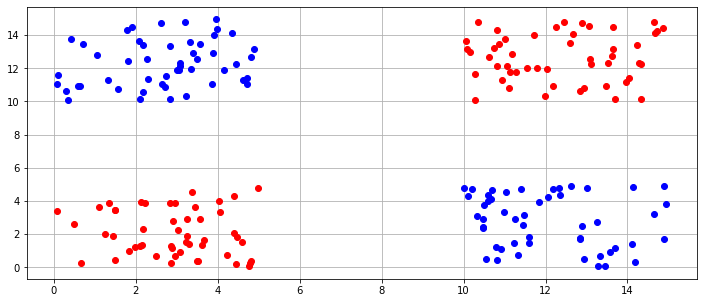

In [32]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

### 문제 1-1

단층 퍼셉트론으로 위의 문제를 해결할 수 없음을 확인해보겠습니다.

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 3.1745 - accuracy: 0.7050
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.7049 - accuracy: 0.6600
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3685 - accuracy: 0.6100
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1274 - accuracy: 0.6000
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9203 - accuracy: 0.5450
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7386 - accuracy: 0.5750
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 1.5170 - accuracy: 0.5650
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2933 - accuracy: 0.5400
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 1.1350 - accuracy: 0.5000
Epoch 10/10
7/7 [==============================] - 0s 2ms/step


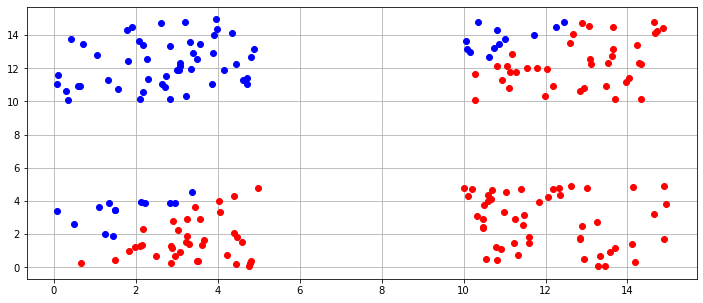

In [33]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10)

# 각각의 변수 명을 모두 다르게 설정했습니다.
# model.predict의 결과값 / preds_1d / pred_class 의 형태(shape)와 값들을 한번 직접 확인해보세요

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

### 문제 1-2
비선형성이 추가되지 않은 단층 퍼셉트론이 어떠한 결정 경계를 만드나요?

딥: 단층 퍼셉트론은 직선 하나의 선형 경계를 만든다. 

## 문제2. 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

 입력 데이터 샘플과 Features : 1077 샘플 x 69 Features (변수)

데이터 label: 다운증후군 (1), 정상군 (2)

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있습니다.
라벨로는 다운증후군 1, 정상군 2로 할당되어 있습니다.


In [34]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [35]:
# 샘플당 100개의 특성(feature)을 가진 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [36]:
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


In [37]:
df.isnull().sum().sum()

0

---

4-1. 사용한 모델을 입력합니다. 

4-2. Accuracy를 입력합니다. 

4-3. Precision 을 입력합니다. 

4-4. Recall 을 입력합니다.

4-5. F1 score 를 입력합니다. 

In [38]:
df_label = df_label - 1

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(df, df_label, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 1. 신경망 모델

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='selu'))
model.add(tf.keras.layers.Dense(16, activation='selu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 1000

In [43]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

In [44]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=0, callbacks=[early_stop])

In [45]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9907


[0.021996403113007545, 0.9907407164573669]

In [46]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 1ms/step


In [47]:
y_pred = y_pred > 0.5

In [48]:
report = classification_report(y_test, y_pred)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       119
           1       0.99      0.99      0.99        97

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



## 2. SVC 모델

In [50]:
from sklearn.svm import SVC

In [51]:
clf = SVC(kernel='rbf', C = 1.0, gamma='auto')
clf.fit(x_train, y_train)

clf_pred = clf.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
report2 = classification_report(y_test, clf_pred)

In [53]:
print(report2)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       119
           1       1.00      0.95      0.97        97

    accuracy                           0.98       216
   macro avg       0.98      0.97      0.98       216
weighted avg       0.98      0.98      0.98       216

